In [89]:
import PIL, random, sys #import native modules
from PIL import Image, ImageDraw #import pillow image drawing modules
from IPython.display import Image as Image_display, display
import json

origDimension = 1500 #sets default image size
r = lambda: random.randint(50,215) #rgb range
rc = lambda: (r(), r(), r())# rgb coordinates
listSym = [] #symmetry square color tracking list

def is_json(event):
    """Determines if input json is in valid format"""
    try:
        json_object = json.loads(event)
    except ValueError:
        return False
    return True

def create_square(border, draw, randColor, element, size):
  if (element == int(size/2)): #if element equals size of sprite/2, draw a rectangle that fits in square border, random color
    draw.rectangle(border, randColor)
  elif (len(listSym) == element+1): #if length of symmetrylist == element + 1, draw a rectangle within the square border and populate the symmetry list TODO
    draw.rectangle(border,listSym.pop())
  else: #else append the random color square to the symmetry tracking list and draw a random color
    listSym.append(randColor)
    draw.rectangle(border, randColor)

def create_invader(border, draw, size):
  x0, y0, x1, y1 = border #coordinates for invader creations
  squareSize = (x1-x0)/size #size of the full border for invader
  randColors = [rc(), rc(), rc(), (0,0,0), (0,0,0), (0,0,0)] #choose random colors based on lambda function "rc()" defined above
  i = 1
  for y in range(0, size):
    i *= -1 #equivalent to i = i*-1, create the opposite side for symmetry
    element = 0 #starting point square 
    for x in range(0, size): #loop through to create color squares within the sprite border
      topLeftX = x*squareSize + x0 #pass through x,y coordinates for square size
      topLeftY = y*squareSize + y0
      botRightX = topLeftX + squareSize
      botRightY = topLeftY + squareSize
      create_square((topLeftX, topLeftY, botRightX, botRightY), draw, random.choice(randColors), element, size) #creates individual pixel squares within the sprite borders
      if (element == int(size/2) or element == 0):
        i *= -1
      element += i

def main(size, invaders, imgSize):
  """Main orchestrator function"""
  origDimension = imgSize #capture the image size
  origImage = Image.new('RGB', (origDimension, origDimension)) #create square border dimensions for full image
  draw = ImageDraw.Draw(origImage) #draw within the full image size
  invaderSize = origDimension/invaders #full image size divided by number of invaders
  padding = invaderSize/size #creates black buffer space between sprites
  for x in range(0, invaders): #nested loops to create coordinate-based grid for sprite borders with black buffer space between sprites
    for y in range(0, invaders):
      topLeftX = x*invaderSize + padding/2 #x-coordinate*invader size + padding/2
      topLeftY = y*invaderSize + padding/2
      botRightX = topLeftX + invaderSize - padding
      botRightY = topLeftY + invaderSize - padding
      create_invader((topLeftX, topLeftY, botRightX, botRightY), draw, size) #creates the invader based on coordinates, full image size, and size of sprite dimensions
  origImage.save("C:/Users/sungwon.chung/Desktop/generative_art/"+"Example-"+str(size)+"x"+str(size)+"-"+str(invaders)+"-"+str(imgSize)+".jpg") # save to path
  display(Image_display(filename="Example-"+str(size)+"x"+str(size)+"-"+str(invaders)+"-"+str(imgSize)+".jpg")) #only displays within function call when wrapped with "display"

#how do I parameterize these arguments through a post api request. I'll likekly need to use the requests module 
# if __name__ == "__main__":
#   main(int(sys.argv[1]), int(sys.argv[2]), int(sys.argv[3])) #system arguments are [SPRITE_DIMENSIONS] [NUMBER] [IMAGE_SIZE], example: python spritething.py 5 5 1900, only odd numbers work

In [90]:
def lambda_handler(event):
    """Main orchestrator function"""
    if is_json == True:
        # In case the input is json
        size = event['size']
        invaders = event['invaders']
        imgSize = event['imgSize']
        origDimension = imgSize #capture the image size
        origImage = Image.new('RGB', (origDimension, origDimension)) #create square border dimensions for full image
        draw = ImageDraw.Draw(origImage) #draw within the full image size
        invaderSize = origDimension/invaders #full image size divided by number of invaders
        padding = invaderSize/size #creates black buffer space between sprites
        for x in range(0, invaders): #nested loops to create coordinate-based grid for sprite borders with black buffer space between sprites
            for y in range(0, invaders):
                topLeftX = x*invaderSize + padding/2 #x-coordinate*invader size + padding/2
                topLeftY = y*invaderSize + padding/2
                botRightX = topLeftX + invaderSize - padding
                botRightY = topLeftY + invaderSize - padding
                create_invader((topLeftX, topLeftY, botRightX, botRightY), draw, size) #creates the invader based on coordinates, full image size, and size of sprite dimensions
        origImage.save("C:/Users/sungwon.chung/Desktop/generative_art/"+"Example-"+str(size)+"x"+str(size)+"-"+str(invaders)+"-"+str(imgSize)+".jpg") # save to path
        display(Image_display(filename="Example-"+str(size)+"x"+str(size)+"-"+str(invaders)+"-"+str(imgSize)+".jpg")) #only displays within function call when wrapped with "display"
    else:
        print("The post method request must be in JSON format using '{size: int, invaders: int, imgSize: int}'")



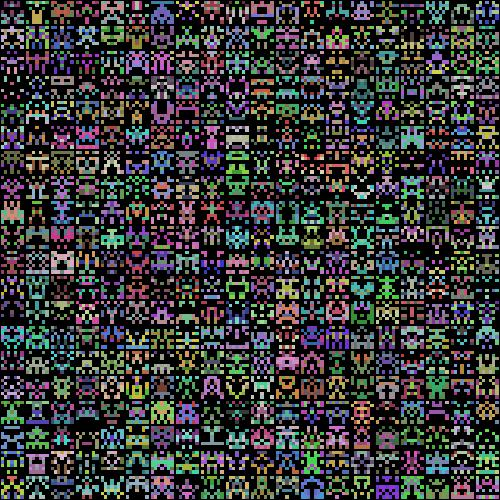

In [73]:
size = 7
invaders = 20
imgSize = 500
main(size, invaders, imgSize)

In [91]:
#figure out how much this needs to be worked on from the python lambda side versus json formatting already taken care of on the API side
post_method = '{"size": 7,"invaders": 5,"imgSize": 500}'
json_object = json.loads(post_method)
lambda_handler(json_object)

The post method request must be in JSON format using '{size: int, invaders: int, imgSize: int}'
